In [42]:
from google.colab import drive
drive.mount("gdrive")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

from keras.models import Sequential
from keras.layers import Dense

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [6]:
white = pd.read_csv("gdrive/My Drive/Wine Quality/winequality-white.csv", delimiter=";")
red = pd.read_csv("gdrive/My Drive/Wine Quality/winequality-red.csv", delimiter=";")

In [7]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
white.isnull().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898


In [13]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
red.isnull().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


From the cell above we can see that there are 3 times more data for white white than for red wine. Also there is not a single line with null values. Now lets try to see if we can find relations between the wine properties or even between the two types of wine.

Text(0.5, 0, 'Alcohol percentage')

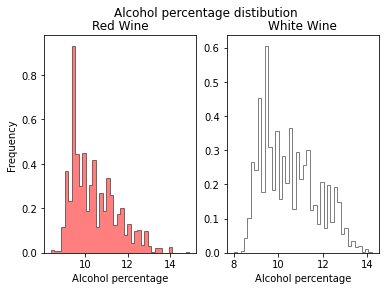

In [15]:
# Distribution of Alcohol percentage for red/white wine

fig, axs = plt.subplots(1, 2)

hist_cfg = dict(alpha=0.5, histtype='stepfilled', ec="k", bins=40, density=True)

axs[0].hist(red["alcohol"], facecolor="red", **hist_cfg)
axs[1].hist(white["alcohol"], facecolor="w", **hist_cfg)

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")
fig.suptitle("Alcohol percentage distibution")
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Alcohol percentage")
axs[1].set_xlabel("Alcohol percentage")

(0.18, 2.25)

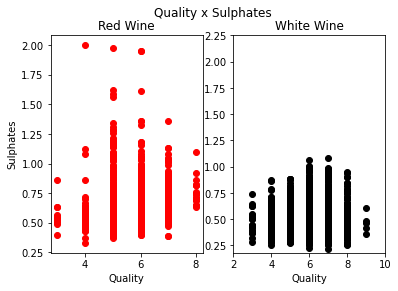

In [16]:
# Relation between sulfates and quality

fig, axs = plt.subplots(1, 2)

axs[0].scatter(red["quality"], red["sulphates"], c="red")
axs[1].scatter(white["quality"], white["sulphates"], c="k")

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")
fig.suptitle("Quality x Sulphates")
axs[0].set_ylabel("Sulphates")
axs[0].set_xlabel("Quality")
axs[1].set_xlabel("Quality")
plt.xlim(2, 10)
plt.ylim(0.18, 2.25)

Text(0.5, 0, 'Residual Sugar (g/dm3)')

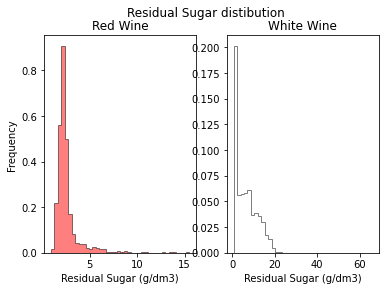

In [17]:
# Distribution of residual sugar for red/white wine

fig, axs = plt.subplots(1, 2)

hist_cfg = dict(alpha=0.5, histtype='stepfilled', ec="k", bins=40, density=True)

axs[0].hist(red["residual sugar"], facecolor="red", **hist_cfg)
axs[1].hist(white["residual sugar"], facecolor="w", **hist_cfg)

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")
fig.suptitle("Residual Sugar distibution")
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Residual Sugar (g/dm3)")
axs[1].set_xlabel("Residual Sugar (g/dm3)")

In [18]:
# Merging red and white wines in a single DataFrame
red["type"] = 1
white["type"] = 0
wine = red.append(white, ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


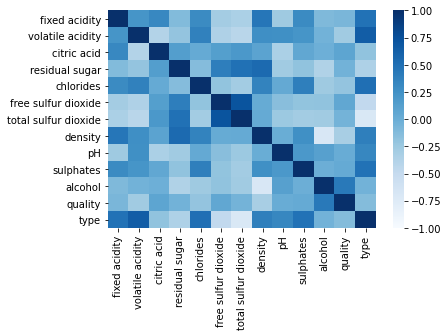

In [19]:
# Correlation matrix

corr = wine.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Blues",
            vmin=-1, vmax=1)

In [20]:
# Data split and preprocessing

X = wine.iloc[:, 0:11]
Y = np.ravel(wine["type"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Model consists of an input layer, one hidden layer and the output layer that
# uses the sigmoid activation function to output probabilities

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.output_shape

(None, 1)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {

In [26]:
model.get_weights()

[array([[ 0.10422838,  0.41459352, -0.3625184 , -0.17764959,  0.11354929,
          0.3719613 , -0.43128204, -0.16774553, -0.41486737,  0.02111655,
          0.26608545, -0.00422674],
        [ 0.04308689,  0.11477381,  0.2993511 , -0.01170301, -0.0491249 ,
          0.3772034 ,  0.01720583, -0.04151103,  0.4381436 , -0.23387656,
         -0.07515684, -0.41164207],
        [ 0.33407485,  0.11371231, -0.00850087,  0.32354134, -0.1324318 ,
         -0.37816626,  0.39582425, -0.2352907 ,  0.37747973, -0.18342787,
         -0.44052696,  0.24433482],
        [-0.05492449, -0.01609245, -0.3779523 ,  0.075203  , -0.0497351 ,
         -0.20209813,  0.18093371,  0.47014403,  0.24935043,  0.40375835,
         -0.26047742, -0.12415585],
        [ 0.11994004,  0.31118894, -0.49397603,  0.40831268,  0.10040897,
         -0.37674528, -0.4223311 ,  0.12543094,  0.4907189 ,  0.49762553,
         -0.01372689,  0.15867782],
        [ 0.25149363, -0.28567111,  0.32842505,  0.4741546 ,  0.02073652,
      

In [27]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=True)

Epoch 1/20
4352/4352 [==============================] - 18s 1ms/step - loss: 0.2250 - accuracy: 0.9090
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0201 - accuracy: 0.9963
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0189 - accuracy: 0.9969
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0153 - accuracy: 0.9977
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0143 - accuracy: 0.9977
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0193 - accuracy: 0.9957
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0231 - accuracy: 0.9952
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0118 - accuracy: 0.9980
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0077 - accuracy: 0.9984
Epoch 10/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.00

In [29]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 12) dtype=float32, numpy=
 array([[-0.06390072, -0.1340014 , -0.03490087, -0.1404373 , -0.22081794,
          0.44770157, -0.13997026,  0.33980885, -0.38152745, -0.11618029,
          0.38517317,  0.07042929],
        [ 0.09853817, -0.41694048,  0.33711526,  0.13468775,  0.26668987,
          0.43016392,  0.30337417, -0.04509038,  0.46754846,  0.01028416,
         -0.07781053, -0.9370499 ],
        [-0.0356659 , -0.09439089, -0.49169225,  0.08972304, -0.0109381 ,
          0.09076909,  0.07559213,  0.01923288,  0.16759993, -0.46831515,
         -0.1734542 ,  0.3413146 ],
        [-0.4035402 ,  0.35525513, -1.0838895 , -0.31644922,  0.28734964,
          0.00246721,  0.40119058,  0.3740803 ,  0.10037141,  0.78195983,
          0.05256365,  0.19145808],
        [ 0.363917  ,  0.9204575 , -0.07789978,  0.87656194,  0.2484885 ,
         -1.2170109 , -1.5845109 , -0.48980948,  1.1279385 ,  0.3823618 ,
         -0.8131371 ,  0.08440626],
        [ 0.

In [35]:
Y_pred = model.predict(X_test)
Y_pred = np.ravel((Y_pred > 0.70).astype(int))
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
Y_test

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
score = model.evaluate(X_test, Y_test, verbose=True)
score

68/68 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9953


[0.020325100049376488, 0.9953380227088928]

In [44]:
confusion_matrix(Y_test, Y_pred)

array([[1586,    2],
       [   9,  548]])

In [45]:
precision_score(Y_test, Y_pred)

0.9963636363636363